# Analyzing Municipal Complaint Resolution: Efficiency, Trends, and Departmental Performance in Syracuse
 **Daniel Canhedo - CuseHacks Datathon 2025**

## 📌 Introduction
This analysis explores **how efficiently Syracuse handles municipal complaints** through the **SYRCityline dataset**, which contains reports on non-emergency issues submitted by residents. The goal is to understand:
- **Which types of complaints are most common?**
- **How long does it typically take to resolve different issues?**
- **Which departments are most efficient in addressing complaints?**
- **How has response time changed over the years?**
- **Does seasonality impact the resolution of certain complaints?**

By answering these questions, this project aims to identify **bottlenecks in issue resolution**, **trends in complaint handling**, and provide insights that could help improve municipal services.

## 📊 The Dataset: Syracuse Cityline
**SYRCityline** is a platform that allows Syracuse residents to report various issues across the city, including:
- **Public Maintenance**: Potholes, streetlights, traffic signals, sidewalks, vacant buildings, cart issues, missing street signs.
- **Sanitation**: Trash collection, illegal dumping, bulk setouts, debris on roads.
- **Animal-Related**: Dead/loose animals, roadkill, animal control.
- **Weather-Related**: Snow plow requests, tree limb obstructions, water main breaks.
- **Vehicle-Related**: Parking violations, abandoned cars

Each report includes a **timestamp**, **issue category**, **assigned department**, and **resolution status**, allowing us to analyze trends in complaint response efficiency.

## ❓ Key Research Questions
### **1️⃣ Which Departments are the Most Efficient?**
- Which departments **close the most cases**?
- What is the **average resolution time** per complaint type?
- Which **types of issues take the longest to resolve**?
- Which departments **have the longest average resolution time**?

### **2️⃣️ How Has Response Time Changed Over the Years?**
- Has the city's response efficiency **improved or declined** since 2021?
- Do certain **departments show improvements over time**?

## 🔬 Approach & Methodology
To explore these questions, we will use:
- **📊 Data Visualization**:
   - Bar charts for complaint distribution
   - Line charts to track resolution trends over time
   - Heatmaps for analyzing seasonal trends
   - Box plots to show resolution time variance
- **📈 Machine Learning Predictions**:
   - **Linear Regression**: Predicting resolution time based on complaint type.
   - **Decision Tree Regressor**: Predicting future resolution performance across all departments
   - **Random Forest Regressor**: Improving resolution time predictions.

By leveraging **data analysis and predictive modeling**, we can uncover actionable insights to help **improve complaint resolution efficiency** in Syracuse.

---

🚀 **Let's dive into the data and explore how Syracuse manages municipal complaints!**

In [333]:
import pandas as pd
import numpy as np

data = pd.read_csv("SYRCityline_Requests.csv")
data.head()

,X,Y,Id,Summary,Rating,Address,Description,Agency_Name,Request_type,Lat,...,Created_at_local,Acknowledged_at_local,Closed_at_local,Minutes_to_Acknowledge,Minutes_to_Close,Assignee_name,Category,Sla_in_hours,Report_Source,ObjectId
0,-8.472894e+06,5.319007e+06,18198655,Sewer Back-ups (INTERNAL),1,"435 Ellis St Syracuse, New York, 13210",Dina 450-3461,Water & Sewage,35820.0,43.0462,...,01/14/2025 - 11:19AM,NaN,NaN,NaN,NaN,Assistant Superintendent of Sewers,Sewer Back-ups (INTERNAL),24.0,Request Form,1
1,-8.479295e+06,5.320378e+06,18214945,Other Sewer-related Concerns,1,"609 N Geddes St Syracuse, New York, 13204",Jet Flush- Jerry 439-6961,Water & Sewage,33840.0,43.0552,...,01/16/2025 - 03:37PM,NaN,NaN,NaN,NaN,Assistant Superintendent of Sewers,Other Sewer-related Concerns,24.0,Request Form,2
2,-8.476745e+06,5.313388e+06,18214845,Report Improperly Set Out Trash or Recycling (...,1,"3138 Midland Ave Syracuse NY 13205, United States",NaN,"Garbage, Recycling & Graffiti",34425.0,43.0093,...,01/16/2025 - 03:26PM,NaN,NaN,NaN,NaN,Public Works Inspector- SP,Report Improperly Set Out Trash or Recycling (...,72.0,iPhone,3
3,-8.477781e+06,5.324004e+06,18214835,Traffic & Parking Signs,1,"406 Willumae Dr Syracuse NY 13208, United States",Damaged sign down,Streets & Transportation,34423.0,43.0790,...,01/16/2025 - 03:25PM,NaN,NaN,NaN,NaN,Superintendent of Transportation,Traffic & Parking Signs,120.0,iPhone,4
4,-8.475632e+06,5.320393e+06,18214821,Report an illegally parked vehicle,1,"300-300 Green St Syracuse, NY, 13203, USA",Cars parked illegally and not following odd ev...,Parking & Vehicles,33844.0,43.0553,...,01/16/2025 - 03:24PM,NaN,NaN,NaN,NaN,Syracuse Police Ordinance,Report an illegally parked vehicle,72.0,Portal,5


In [334]:
data["Category"].unique().tolist()

['Sewer Back-ups (INTERNAL)',
 'Other Sewer-related Concerns',
 'Report Improperly Set Out Trash or Recycling (Illegal Setout)',
 'Traffic & Parking Signs',
 'Report an illegally parked vehicle',
 'Animal Control',
 'Report a Skipped Weekly Trash Pick Up (Internal)',
 'Report a Pothole',
 'Cart Stolen',
 'Cart Broken',
 'Report Litter on Private Land',
 'Traffic Signals',
 'Other Parks, Trees & Public Utilities Concern',
 'Pavement Markings',
 'Report an Abandoned Vehicle',
 'Report a Skipped Weekly Trash Pick Up',
 'Report Trash/Debris Outside a Home/Building',
 'Vacant Buildings',
 'Tree Care and Removal',
 'Report Litter on Public Land',
 'Home & Building Maintenance',
 'Report internal structural damage of a Catch Basin/Storm Drain',
 'Report a Skipped Recycling Pick Up (Internal)',
 'Property Damage- INTERNAL',
 'Report a Skipped Bulk Pick Up (Internal)',
 'Sanitation Exempt Skipped',
 'Trash Can on Public Land',
 'Report a Skipped Recycling Pick Up',
 'Tires',
 'Report a Skipped 

In [335]:
category = pd.read_csv("DatathonCategories.csv")

category.head()

,Water/Sewer-Related,Traffic and Parking Signs,Trash-collection,Litter,Vehicle-related,Animal-related,Roadkill,Pothole,Cart,Parks & Trees,...,Graffiti,Parking Meter,Illegal Setouts,Streets and Sidewalk,"Health, Safety and Social Services",Codes Violations/Dispute,Snow & Ice,Construction Debris,Unnamed: 22,Unnamed: 23
0,Sewer Back-ups (INTERNAL),Traffic & Parking Signs,Report Improperly Set Out Trash or Recycling (...,Report Litter on Private Land,NaN,Animal Control,Report Roadkill,Report a Pothole,Cart Stolen,"Other Parks, Trees & Public Utilities Concern",...,Graffiti on Private Land,Report an illegally parked vehicle,Illegal Setouts,Sidewalks,"Other Health, Safety & Social Services Concern",Codes Violations/Dispute,Snow & Ice,Construction Debris,NaN,NaN
1,Report internal structural damage of a Catch B...,Traffic Signals,Report a Skipped Weekly Trash Pick Up (Internal),NaN,Report an Abandoned Vehicle,Deer Sighting,Roadkill,Potholes,Cart Broken,Tree Care and Removal,...,Graffiti on Public Land,Other Parking & Vehicles Concern,NaN,"Other Streets, Sidewalks & Transportation Concern","Health, Safety and Social Services",NaN,Unshoveled Sidewalks,Request Construction Debris Pick Up (May and S...,NaN,NaN
2,Other Sewer-related Concerns,Street Lights,Report a Skipped Weekly Trash Pick Up,Report Trash/Debris Outside a Home/Building,Tires,Dog Control,NaN,NaN,Cart Feedback,Internal Landscaping Projects,...,NaN,Parking Tickets,NaN,"Streets, Sidewalks & Transportation",NaN,NaN,NaN,NaN,NaN,NaN
3,Water-related Concerns,NaN,Report a Skipped Recycling Pick Up (Internal),Report Litter on Public Land,NaN,Other Animal-related Concern,NaN,NaN,Sanitation Carts,Report Overgrowth on Public land,...,NaN,NaN,NaN,Pavement Markings,NaN,NaN,NaN,NaN,NaN,NaN
4,Report external dirt/debris blocking a Catch B...,NaN,Report a Skipped Bulk Pick Up (Internal),Trash Can on Public Land,NaN,NaN,NaN,NaN,Cart Not Delivered,Park Maintenance,...,NaN,NaN,NaN,Curb/Sidewalk Removal Concerns,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Water/Sewer-Related                 8 non-null      object 
 1   Traffic and Parking Signs           3 non-null      object 
 2   Trash-collection                    13 non-null     object 
 3   Litter                              9 non-null      object 
 4   Vehicle-related                     2 non-null      object 
 5   Animal-related                      4 non-null      object 
 6   Roadkill                            2 non-null      object 
 7   Pothole                             2 non-null      object 
 8   Cart                                10 non-null     object 
 9   Parks & Trees                       12 non-null     object 
 10  Abandoned Property                  2 non-null      object 
 11  Property-Maintenance                4 non-null 

In [337]:
category_mapping = {}

# this will convert our category dataframe into a dictionary where each general category has a list of subcategories
for col in category.columns:                            # loops through category columns
    subcategories = category[col].dropna().tolist()   # gets all our subcategories taking into account nulls
    for subcat in subcategories:
        category_mapping[subcat] = col             # maps the subcategory to general category

# maps category column in data to general category
data["Consolidated Category"] = data["Category"].map(category_mapping)
data[["Category", "Consolidated Category"]].head()

,Category,Consolidated Category
0,Sewer Back-ups (INTERNAL),Water/Sewer-Related
1,Other Sewer-related Concerns,Water/Sewer-Related
2,Report Improperly Set Out Trash or Recycling (...,NaN
3,Traffic & Parking Signs,Traffic and Parking Signs
4,Report an illegally parked vehicle,Parking Meter


In [338]:
data["Minutes_to_Close"].isnull().sum()
# our data has 5450 null values for minutes_to_close

# this will count how many null values we have per consolidated categories. essentially this is how many unresolved cases we have by category
categoryNulls = {}
for category in data["Consolidated Category"].unique():
    categoryNulls[category] = data[data["Consolidated Category"] == category]["Minutes_to_Close"].isnull().sum()

for key, value in categoryNulls.items():
    print(key, value)

Water/Sewer-Related 957
nan 0
Traffic and Parking Signs 164
Parking Meter 103
Animal-related 37
Trash-collection 718
Pothole 120
Cart 1325
Litter 454
Parks & Trees 420
Streets and Sidewalk 267
Vehicle-related 137
Abandoned Property 24
Property-Maintenance 152
Sanitation-related 96
Random 104
Graffiti 13
Roadkill 27
Illegal Setouts 134
Codes Violations/Dispute 2
Construction Debris 21
Snow & Ice 16
Health, Safety and Social Services 1


-----------------------------------------------------

### **1⃣ Which issues grasp Syracuse the most and which Departments are the Most Efficient?**
- Which departments **have the most open cases on average?**?
- Which departments **have the shortest average resolution time**?
- What is the **average resolution time** per complaint type?
- Which **types of issues take the longest to resolve**?

Steps taken:

Here, I categorized different issues into categories according to type as shown below. I proceeded to create a new column in the pandas dataframe called "Consolidated Category". This will help to generalize categories that are similar but labeled as different.

| **Category** | **Subcategories** |
|-------------|-------------------|
| Water - Sewer-Related | Sewer Back-ups (INTERNAL), Report internal structural damage of a Catch Basin/Storm Drain, Other Sewer-related Concerns, Water-related Concerns, Report external dirt/debris blocking a Catch Basin/Storm Drain, Report a Problem with a Catch Basin/Storm Drain, Other Water & Sewage Concern, Report internal clogging of a Catch Basin/Storm Drain |
| Traffic and Parking Signs | Traffic & Parking Signs, Traffic Signals, Street Lights, Pavement Markings |
| Trash-collection | Report a Skipped Weekly Trash Pick Up (Internal), Report a Skipped Weekly Trash Pick Up, Report a Skipped Recycling Pick Up (Internal), Report a Skipped Bulk Pick Up (Internal), Report a Skipped Bulk Pick Up, Report a Skipped Recycling Pick Up, Weekly Trash Pickup, Large or Bulk Items - Skipped Pickup, Recycling (pick up that has been skipped) |
| Litter | Report Litter on Private Land, Report Litter on Public Land, Adopt-A-Block Earth Day Litter Pickup Request |
| Vehicle-related | Report an Abandoned Vehicle, Report an illegally parked vehicle, Other Parking & Vehicles Concern, Parking Tickets |
| Animal-related | Animal Control, Dog Control, Other Animal-related Concern, Deer Sighting |
| Roadkill | Report Roadkill |
| Pothole | Report a Pothole, Potholes |
| Cart | Cart Stolen, Cart Broken, Cart Feedback, Sanitation Carts, Mixed-Use Cart Request, Second Cart Request, Sanitation Cart Not Received, Cart Not Delivered, Carts-Wrong Number of Carts Delivered, Carts-Request an Elderly or Disabled Service |
| Parks & Trees | Other Parks, Trees & Public Utilities Concern, Tree Care and Removal, Park Maintenance, Request a free street tree planting (City of Syracuse Property Owners Only), Playground Equipment |
| Abandoned Property | Vacant Buildings, Vacant Land |
| Property-Maintenance | Property Damage- INTERNAL, Home & Building Maintenance, Other Housing & Property Maintenance Concern, Housing & Property Maintenance |
| Random | Please use this space to provide feedback to the City |
| Sanitation-related | Illegal setout/sanitation violation dispute, Sanitation Exempt Skipped, Sanitation Exempt Skipped (recycling), Other Garbage & Recycling |
| Graffiti | Graffiti on Private Land, Graffiti on Public Land |
| Parking Meter | Report an illegally parked vehicle |
| Illegal Setouts | Report Improperly Set Out Trash or Recycling (Illegal Setout), Illegal Setouts |
| Streets and Sidewalk | Sidewalks, Other Streets, Sidewalks & Transportation Concern, Streets, Sidewalks & Transportation, Curb/Sidewalk Removal Concerns, Unshoveled Sidewalks |
| Health, Safety and Social Services | Other Health, Safety & Social Services Concern, Health, Safety and Social Services |
| Codes Violations/Dispute | Codes Violations/Dispute |
| Snow & Ice | Snow & Ice |
| Construction Debris | Construction Debris, Request Construction Debris Pick Up (May and September Only) |
| Report Source | To report an illegally parked vehicle, please call the Syracuse Police Ordinance at 315-448-8650. If this is an emergency, please call 911. Do NOT submit requests to Cityline. To report an abandoned vehicle, please call the Syracuse Police Ordinance at 315-448-8650. If this is an emergency, please call 911. Do NOT submit requests to Cityline. |

-----------------------------------------------------

### Findings: Total open cases
As seen in chart 1), Cart, Water/Sewage, and Trash-Collection and litter were the top four issues with open cases
As seen in chart 2), Garbage/Recycling, Sanitation Carts, Water and Sewage, and Sidewalk, Streets, and transportation were the categories with highest open cases.
The largest issues that Syracuse residents face are undoubtedly to do with trash carts. This includes broken carts, and lost/missing/stolen carts, request for replacement carts, and any other cart related issue. Furthermore, water and sewage is also high on the list with almost 1000 open cases. Syracuse also has many problems with trash-collection.



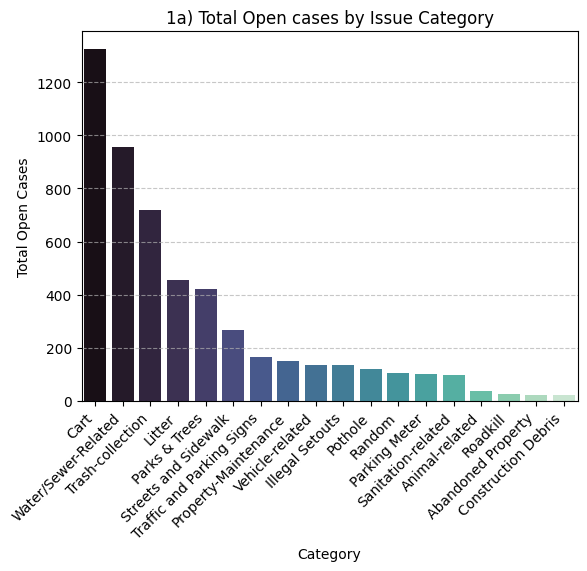

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot Open cases by Issue Category

df = pd.DataFrame(categoryNulls.items(), columns=["Category", "Open Cases"])
newdf = df[df["Open Cases"] > 20].sort_values("Open Cases", ascending=False)
# plt.figure(figsize=(12, 6))  # Adjust figure size

sns.barplot(data=newdf, x="Category", y="Open Cases", hue="Category", palette="mako")
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("1a) Total Open cases by Issue Category")
plt.ylabel("Total Open Cases")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



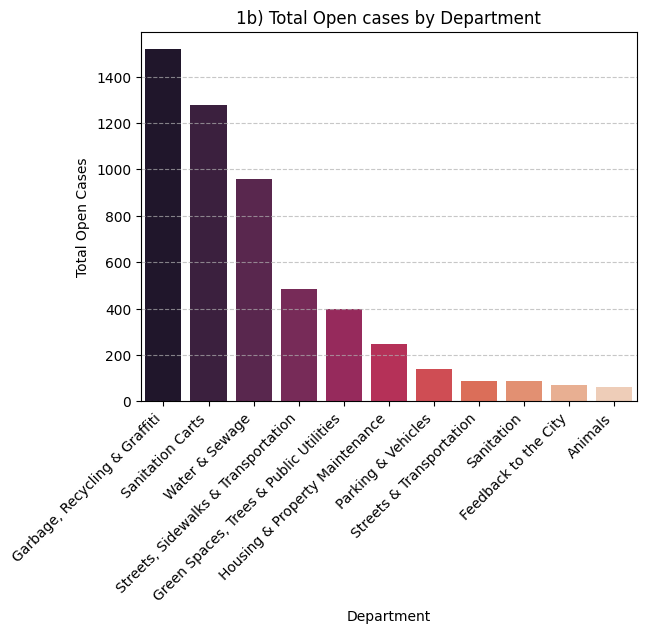

In [340]:
# this is how many unresolved cases we have by department

departmentNulls = {}
for department in data["Agency_Name"].unique():
    departmentNulls[department] = data[data["Agency_Name"] == department]["Minutes_to_Close"].isnull().sum()

import matplotlib.pyplot as plt
# plot Open cases by Issue Category

df = pd.DataFrame(departmentNulls.items(), columns=["Department", "Open Cases"])
newdf = df[df["Open Cases"] > 5].sort_values("Open Cases", ascending=False)

sns.barplot(data=newdf, x="Department", y="Open Cases", hue="Department", palette="rocket")
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("1b) Total Open cases by Department")
plt.ylabel("Total Open Cases")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

-----------------------------------------------------

# Findings: Open Cases vs. total cases

Now lets look more at specific departments and more how efficient htey are. According to chart 1


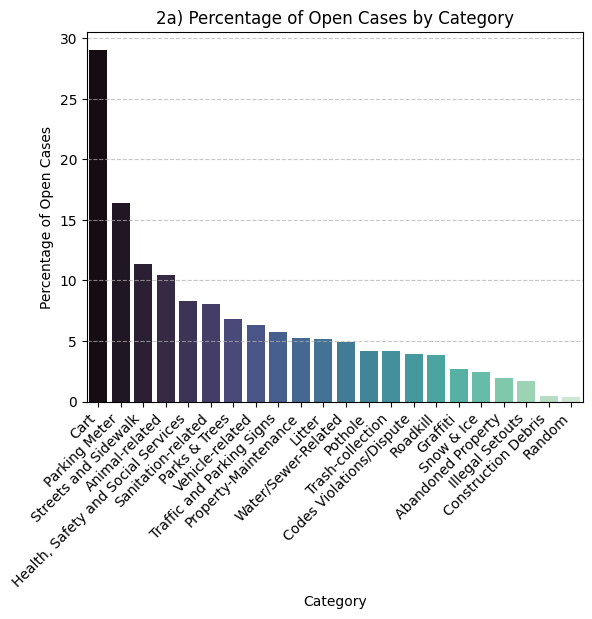

In [341]:
# now we need to find the average of open cases compared to total number of cases for category

categoryPercentages = {}
total_cases = 0
# get total number of cases per category (including opened and closed cases)
for category in data["Consolidated Category"].unique():
    total_cases = data[data["Consolidated Category"] == category].shape[0]  # this will get us the total number of cases per category
    categoryPercentages[category] = total_cases

    openCases = categoryNulls[category]

    if total_cases > 0:  # this avoids division by 0
        categoryPercentages[category] = (openCases / total_cases) * 100
    else:
        categoryPercentages[category] = 0

df = pd.DataFrame(categoryPercentages.items(), columns=["Category", "Total Cases"]).sort_values("Total Cases", ascending=False) # puts into df
df.head()
# data[data["Consolidated Category"] ==]

import matplotlib.pyplot as plt

# plot Open cases averages by Issue Category
df = pd.DataFrame(categoryPercentages.items(), columns=["Category", "Total Cases"]).sort_values("Total Cases", ascending=False)

sns.barplot(data=df, x="Category", y="Total Cases", hue="Category", palette="mako", legend=False)
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("2a) Percentage of Open Cases by Category")
plt.ylabel("Percentage of Open Cases")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

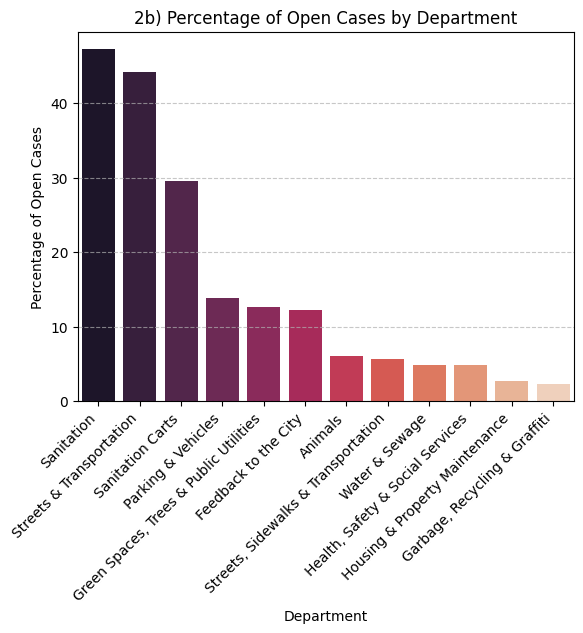

In [347]:
# now we need to find the average of open cases compared to total number of cases for departments

departmentPercentages = {}
total_cases = 0
# get total number of cases per category (including opened and closed cases)
for department in data["Agency_Name"].unique():
    total_cases = data[data["Agency_Name"] == department].shape[0]  # this will get us the total number of cases per category
    departmentPercentages[department] = total_cases

    openCases = departmentNulls[department]

    if (total_cases > 0) and total_cases != 1:  # this avoids division by 0
        departmentPercentages[department] = (openCases / total_cases) * 100
    else:
        departmentPercentages[department] = 0


import matplotlib.pyplot as plt

# plot Open cases averages by Issue Category
df = pd.DataFrame(departmentPercentages.items(), columns=["Department", "Open Case Percentage"]).sort_values("Open Case Percentage", ascending=False)

# remove irrelevant departments in df which idk why they're there
excluded_departments = ["1", "0", "Report a missing traffic/parking sign", "Which of the following best describes your concern?", "Report a maintenance issue", "Report an unsafe building as seen from the outside of the building"]
df = df[~df["Department"].isin(excluded_departments)]

sns.barplot(data=df, x="Department", y="Open Case Percentage", hue="Department", palette="rocket", legend=False)
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("2b) Percentage of Open Cases by Department")
plt.ylabel("Percentage of Open Cases")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

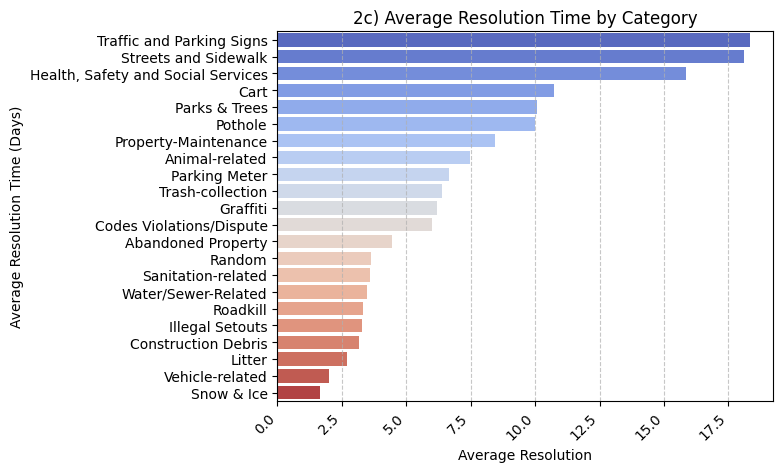

In [348]:
# Average resolution time per category = sum(resolution time for all issues in category) / total number of issues in one category
# now we need to find the average of open cases compared to total number of cases for category

categoryMinutes = {}
averageResolution = 0
# get total number of cases per category (including opened and closed cases)
for category in data["Consolidated Category"].unique():
    averageResolution = data[data["Consolidated Category"] == category]["Minutes_to_Close"].sum()  # this will get us the total number of minutes per category
    categoryMinutes[category] = averageResolution

    # this will get us the number of closed cases in a category
    numClosedCases = data[(data["Consolidated Category"] == category) & data["Minutes_to_Close"].notnull()].shape[0]

    if averageResolution > 0:  # this avoids division by 0
        categoryMinutes[category] = (averageResolution / numClosedCases) / 1440 # gets resolution time in days
    else:
        categoryMinutes[category] = 0

df = pd.DataFrame(categoryMinutes.items(), columns=["Category", "Average Resolution"]).sort_values("Average Resolution", ascending=False) # puts into df

# remove irrelevant departments in df which idk why they're there
# excluded_departments = ["1", "0", "Report a missing traffic/parking sign", "Which of the following best describes your concern?", "Report a maintenance issue", "Report an unsafe building as seen from the outside of the building"]
# df = df[~df["Department"].isin(excluded_departments)]

sns.barplot(data=df, y="Category", x="Average Resolution", hue="Category", palette="coolwarm", legend=False)
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("2c) Average Resolution Time by Category")
plt.ylabel("Average Resolution Time (Days)")
plt.grid(axis="x", linestyle="--", alpha=0.7)


plt.show()

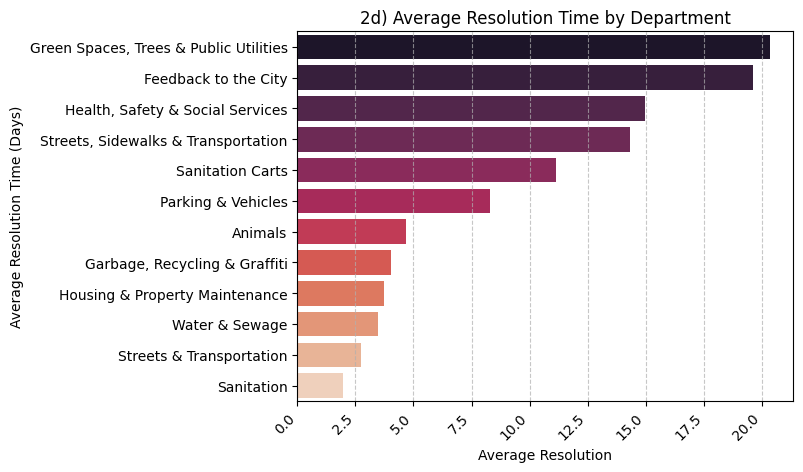

In [349]:
 # Average resolution time per category = sum(resolution time for all issues in category) / total number of issues in one category
# now we need to find the average of open cases compared to total number of cases for category

departmentMinutes = {}
averageResolution = 0
# get total number of cases per category (including opened and closed cases)
for department in data["Agency_Name"].unique():
    averageResolution = data[data["Agency_Name"] == department]["Minutes_to_Close"].sum()  # this will get us the total number of minutes per category
    departmentMinutes[department] = averageResolution

    # this will get us the number of closed cases in a category
    numClosedCases = data[(data["Agency_Name"] == department) & data["Minutes_to_Close"].notnull()].shape[0]

    if averageResolution > 0:  # this avoids division by 0
        departmentMinutes[department] = (averageResolution / numClosedCases) / 1440 # gets resolution time in days
    else:
        departmentMinutes[department] = 0

df = pd.DataFrame(departmentMinutes.items(), columns=["Department", "Average Resolution"]).sort_values("Average Resolution", ascending=False) # puts into df

# remove irrelevant departments in df which idk why they're there
excluded_departments = ["1", "0", "Report a missing traffic/parking sign", "Which of the following best describes your concern?", "Report a maintenance issue", "Report an unsafe building as seen from the outside of the building"]
df = df[~df["Department"].isin(excluded_departments)]

sns.barplot(data=df, y="Department", x="Average Resolution", hue="Department", palette="rocket", legend=False)
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees and align text to the right
plt.title("2d) Average Resolution Time by Department")
plt.ylabel("Average Resolution Time (Days)")
plt.grid(axis="x", linestyle="--", alpha=0.7)


plt.show()

-----------------------------------------------------

# Second Question

### **2️⃣️ How Has Response Time Changed Over the Years?**
- Has the city's response efficiency **improved or declined** since 2021?
- Do certain **departments show improvements over time**?

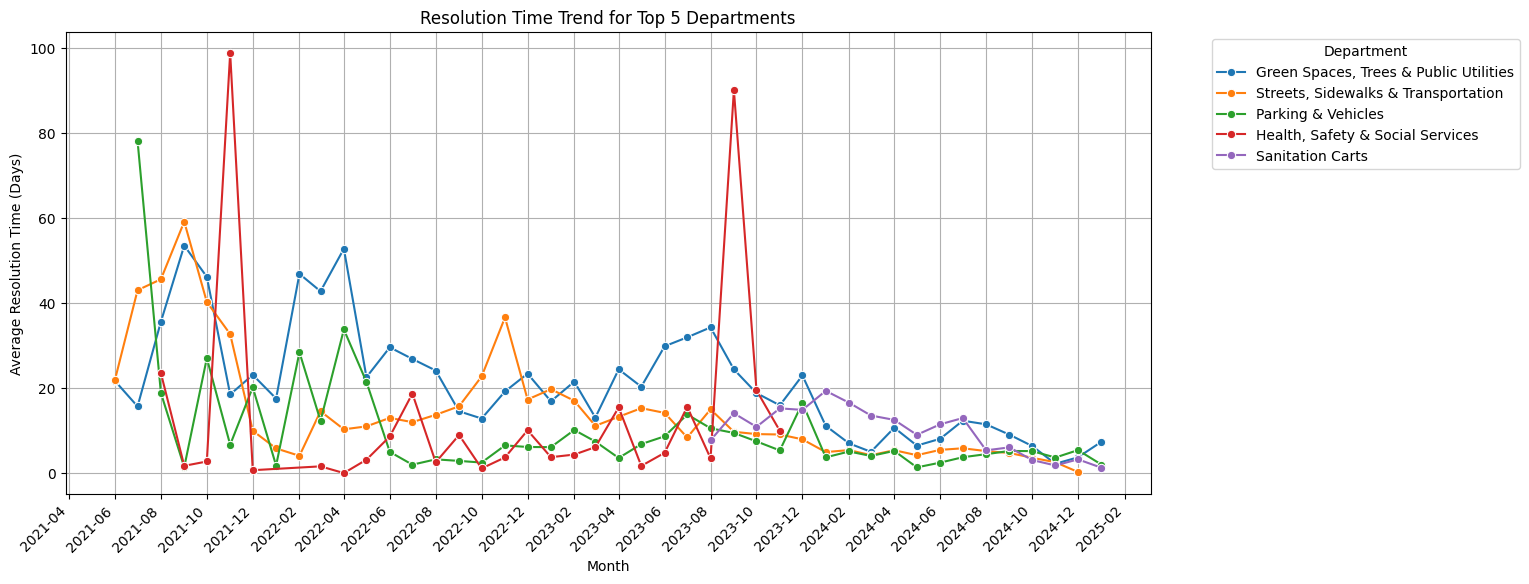

In [345]:
# now lets only get the departments with top 5 most issues

# let's get the top 5 departments with the highest average resolution time
top_departments = avg_time_by_month.groupby("Agency_Name")["Minutes_to_Close"].mean().nlargest(5).index
filtered_data = avg_time_by_month[avg_time_by_month["Agency_Name"].isin(top_departments)]

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))

# Plot only the top 5 departments
sns.lineplot(data=filtered_data, x="Month", y="Minutes_to_Close", hue="Agency_Name", marker="o")

# Adjust x-axis ticks
plt.xticks(rotation=45, ha="right")
plt.xlabel("Month")
plt.ylabel("Average Resolution Time (Days)")
plt.title("Resolution Time Trend for Top 5 Departments")

# Show only every 3rd month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Move legend outside the plot
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.grid()
plt.show()

/var/folders/_m/rsgk49zs2d74lsc_gp1_z6zr0000gn/T/ipykernel_1211/3588525488.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=avg_time_by_month["Month"].max(), periods=12, freq="M")
/Users/danielcanhedo/PycharmProjects/CuseHacksDatathon2025/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


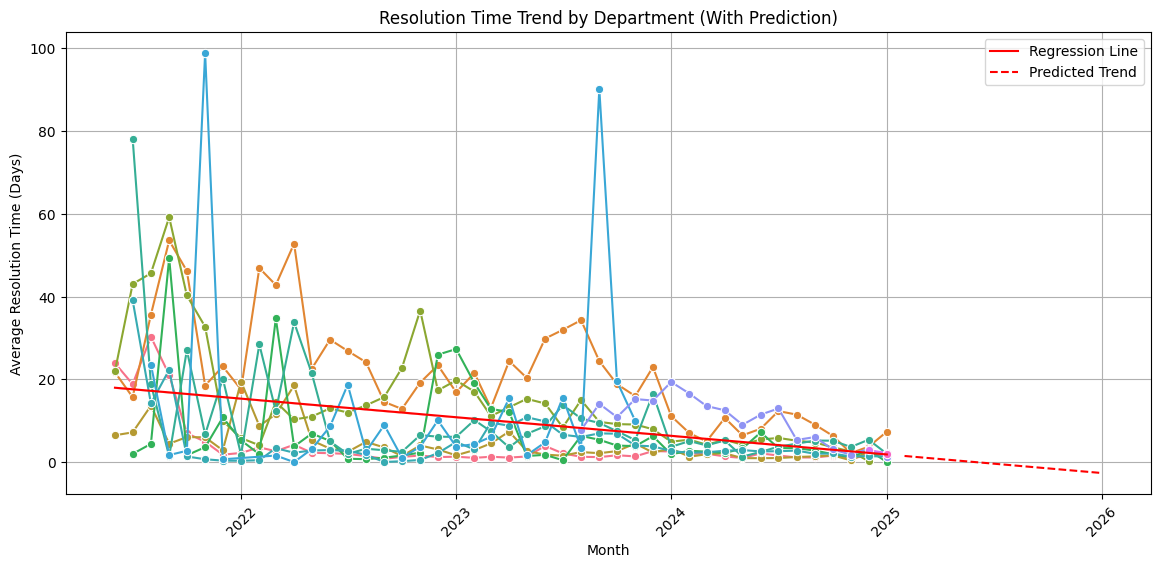

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Convert timestamps to datetime format
data["Created_at_local"] = pd.to_datetime(data["Created_at_local"], format="%m/%d/%Y - %I:%M%p")
data["Month"] = data["Created_at_local"].dt.to_period("M").astype(str)

# Group by month and department
avg_time_by_month = data.groupby(["Month", "Agency_Name"])["Minutes_to_Close"].mean().reset_index()
excluded_departments = ["1", "0", "Report a missing traffic/parking sign", "Which of the following best describes your concern?", "Report a maintenance issue", "Report an unsafe building as seen from the outside of the building", "Feedback to the City"]

avg_time_by_month = avg_time_by_month[~avg_time_by_month["Agency_Name"].isin(excluded_departments)]
avg_time_by_month["Minutes_to_Close"] = avg_time_by_month["Minutes_to_Close"] / 1440
avg_time_by_month["Month"] = pd.to_datetime(avg_time_by_month["Month"]) # converts to actual date/time so matplot can understand


# build linear regression model (ChatGPT)



avg_time_by_month = avg_time_by_month.dropna(subset=["Minutes_to_Close"])
avg_time_by_month["Timestamp"] = avg_time_by_month["Month"].map(pd.Timestamp.toordinal)


# defines features (X) and target (y)
X = avg_time_by_month[["Timestamp"]]
y = avg_time_by_month["Minutes_to_Close"]

# trains a simple Linear Regression model
model = LinearRegression()
model.fit(X, y)

avg_time_by_month["Predicted_Resolution_Time"] = model.predict(X) # predict time for existing data

# predicts future resolution times (for the next 12 months)
future_dates = pd.date_range(start=avg_time_by_month["Month"].max(), periods=12, freq="M")
future_timestamps = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_predictions = model.predict(future_timestamps)

# creates a dataframe for our future prediction plots
future_df = pd.DataFrame({
    "Month": future_dates,
    "Predicted_Resolution_Time": future_predictions
})

plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_time_by_month, x="Month", y="Minutes_to_Close", hue="Agency_Name", marker="o", legend=False) # plots actual data
sns.lineplot(data=avg_time_by_month, x="Month", y="Predicted_Resolution_Time", color="red", label="Regression Line") # plots past data
sns.lineplot(data=future_df, x="Month", y="Predicted_Resolution_Time", color="red", linestyle="dashed", label="Predicted Trend") # plots future prediction

# Adjust x-axis formatting
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Average Resolution Time (Days)")
plt.title("Resolution Time Trend by Department (With Prediction)")
plt.grid()
plt.legend()

plt.show()